In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_excel('Data_Cortex_Nuclear.xls')
raw_data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
MouseID            1080 non-null object
DYRK1A_N           1077 non-null float64
ITSN1_N            1077 non-null float64
BDNF_N             1077 non-null float64
NR1_N              1077 non-null float64
NR2A_N             1077 non-null float64
pAKT_N             1077 non-null float64
pBRAF_N            1077 non-null float64
pCAMKII_N          1077 non-null float64
pCREB_N            1077 non-null float64
pELK_N             1077 non-null float64
pERK_N             1077 non-null float64
pJNK_N             1077 non-null float64
PKCA_N             1077 non-null float64
pMEK_N             1077 non-null float64
pNR1_N             1077 non-null float64
pNR2A_N            1077 non-null float64
pNR2B_N            1077 non-null float64
pPKCAB_N           1077 non-null float64
pRSK_N             1077 non-null float64
AKT_N              1077 non-null float64
BRAF_N             1077 non-null 

In [4]:
# Most column names are gene names.  
# MouseID includes both mouse ID and measurement number (15 measurements/mouse).  
# class summarizes Genotype, Treatment, and Behavior
new_cols = ['Mouse','Rep']
data = raw_data.join(pd.DataFrame(list(raw_data['MouseID'].str.split('_')),columns = new_cols))
data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class,Mouse,Rep
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m,309,1
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m,309,2
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m,309,3
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m,309,4
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m,309,5


In [20]:
# identify which columns represent protein names
not_a_protein = ['Genotype','Behavior','Treatment','class'] + new_cols + ['MouseID']
protein_names = list(set(data.columns.values) - set(not_a_protein))

In [6]:
data.set_index(not_a_protein).head()

DYRK1A_N   ITSN1_N  \
Genotype Behavior Treatment class  Mouse Rep MouseID                       
Control  C/S      Memantine c-CS-m 309   1   309_1    0.503644  0.747193   
                                         2   309_2    0.514617  0.689064   
                                         3   309_3    0.509183  0.730247   
                                         4   309_4    0.442107  0.617076   
                                         5   309_5    0.434940  0.617430   

                                                        BDNF_N     NR1_N  \
Genotype Behavior Treatment class  Mouse Rep MouseID                       
Control  C/S      Memantine c-CS-m 309   1   309_1    0.430175  2.816329   
                                         2   309_2    0.411770  2.789514   
                                         3   309_3    0.418309  2.687201   
                                         4   309_4    0.358626  2.466947   
                                         5   309_5    0.358802  2.365785   

                                                        NR2A_N    pAKT_N  \
Genotype Behavior Treatment class  Mouse Rep MouseID                       
Control  C/S      Memantine c-CS-m 309   1   309_1    5.990152  0.218830   
                                         2   309_2    5.685038  0.211636   
                                         3   309_3    5.622059  0.209011   
                                         4   309_4    4.979503  0.222886   
                                         5   309_5    4.718679  0.213106   

                                                       pBRAF_N  pCAMKII_N  \
Genotype Behavior Treatment class  Mouse Rep MouseID                        
Control  C/S      Memantine c-CS-m 309   1   309_1    0.177565   2.373744   
                                         2   309_2    0.172817   2.292150   
                                         3   309_3    0.175722   2.283337   
                                         4   309_4    0.176463   2.152301   
                                         5   309_5    0.173627   2.134014   

                                                       pCREB_N    pELK_N  ...  \
Genotype Behavior Treatment class  Mouse Rep MouseID                      ...   
Control  C/S      Memantine c-CS-m 309   1   309_1    0.232224  1.750936  ...   
                                         2   309_2    0.226972  1.596377  ...   
                                         3   309_3    0.230247  1.561316  ...   
                                         4   309_4    0.207004  1.595086  ...   
                                         5   309_5    0.192158  1.504230  ...   

                                                         SHH_N     BAD_N  \
Genotype Behavior Treatment class  Mouse Rep MouseID                       
Control  C/S      Memantine c-CS-m 309   1   309_1    0.188852  0.122652   
                                         2   309_2    0.200404  0.116682   
                                         3   309_3    0.193685  0.118508   
                                         4   309_4    0.192112  0.132781   
                                         5   309_5    0.205604  0.129954   

                                                      BCL2_N     pS6_N  \
Genotype Behavior Treatment class  Mouse Rep MouseID                     
Control  C/S      Memantine c-CS-m 309   1   309_1       NaN  0.106305   
                                         2   309_2       NaN  0.106592   
                                         3   309_3       NaN  0.108303   
                                         4   309_4       NaN  0.103184   
                                         5   309_5       NaN  0.104784   

                                                       pCFOS_N     SYP_N  \
Genotype Behavior Treatment class  Mouse Rep MouseID                       
Control  C/S      Memantine c-CS-m 309   1   309_1    0.108336  0.427099   
                                         2   309_2    0.104315  0.4

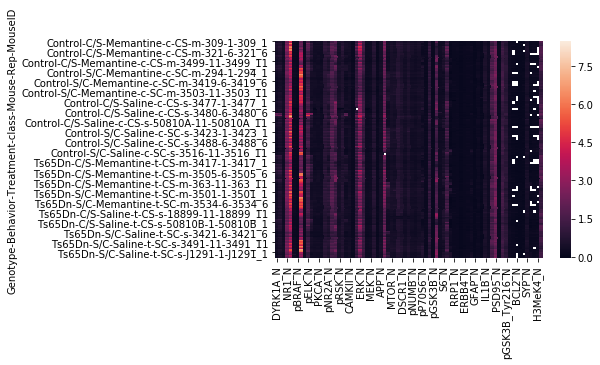

In [12]:
sns.heatmap(data.set_index(not_a_protein))

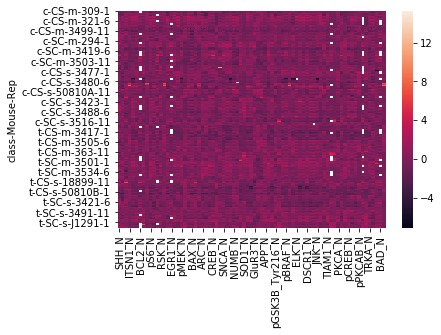

In [26]:
data_normed = data.set_index(['class','Mouse','Rep']).loc[:,protein_names]
data_normed = (data_normed-data_normed.mean())/data_normed.std()
sns.heatmap(data_normed)

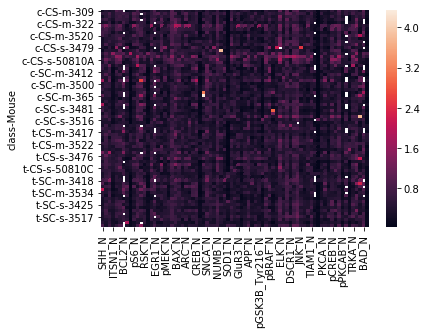

In [30]:
sns.heatmap(data_normed.groupby(['class','Mouse']).std())

In [31]:
data2 = data.set_index(['Mouse','Rep']).loc[:,protein_names]
outliers = data2
mice = data.Mouse.unique()
reps = data.Rep.unique()
means = data2.groupby('Mouse').mean()
stdevs = data2.groupby('Mouse').std()